# **Load CIFAR-10 dataset**

In [1]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


# **Visualizing the first 36 training images**

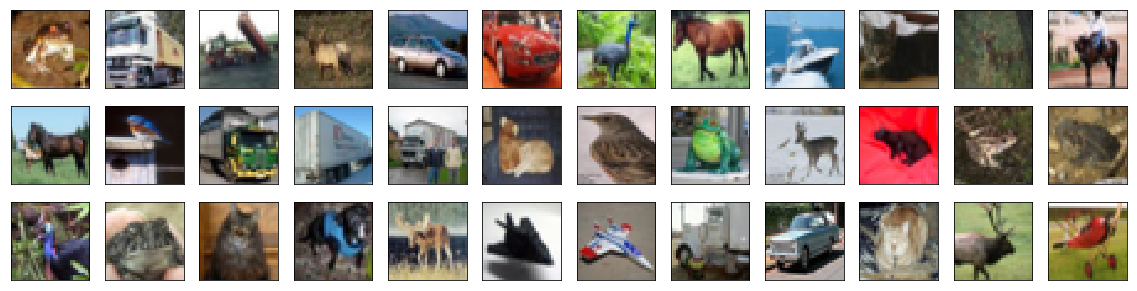

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize = (20 , 5))
for i in range(36):
  ax = fig.add_subplot(3 , 12 , i+1 , xticks =[] , yticks = [])
  ax.imshow(np.squeeze(X_train[i]))

# **Rescaling the images by dividing every pixel by 255**

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# **Breaking the dataset into training , testing and validation datasets**

In [4]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(X_train , X_valid) = X_train[5000:] , X_train[:5000]
(y_train , y_valid) = y_train[5000:] , y_train[:5000]

print('X_train shape: ' , X_train.shape)

print(X_train.shape[0] , 'training samples')
print(X_test.shape[0] , 'testing samples')
print(X_valid.shape[0] , 'validation samples')

X_train shape:  (45000, 32, 32, 3)
45000 training samples
10000 testing samples
5000 validation samples


# **Define the model's archirecture**

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size = 2 , padding = 'same' , activation = 'relu' , input_shape = (32 , 32 , 3)))
model.add (MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32 , kernel_size = 2 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64 , kernel_size = 2 , padding = 'same' , activation  = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500 , activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10 , activation = 'softmax'))

model.summary()

W0627 10:22:10.506341 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 10:22:10.546221 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 10:22:10.558139 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 10:22:10.588874 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 10:22:10.626784 140058058774400 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

# **Compile the model**

In [6]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'])

W0627 10:22:14.046718 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 10:22:14.083818 140058058774400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# **Train the model**

In [7]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5' , verbose = 1 , save_best_only = True)

hist = model.fit(X_train , y_train , batch_size = 32 , epochs = 100 , validation_data = (X_valid , y_valid) , callbacks = [checkpointer] , verbose = 2 , shuffle = True)

W0627 10:22:25.497264 140058058774400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 17s - loss: 1.5784 - acc: 0.4272 - val_loss: 1.3152 - val_acc: 0.5224

Epoch 00001: val_loss improved from inf to 1.31525, saving model to model.weights.best.hdf5
Epoch 2/100
 - 12s - loss: 1.2539 - acc: 0.5542 - val_loss: 1.2582 - val_acc: 0.5608

Epoch 00002: val_loss improved from 1.31525 to 1.25824, saving model to model.weights.best.hdf5
Epoch 3/100
 - 12s - loss: 1.1341 - acc: 0.6007 - val_loss: 1.0561 - val_acc: 0.6354

Epoch 00003: val_loss improved from 1.25824 to 1.05607, saving model to model.weights.best.hdf5
Epoch 4/100
 - 12s - loss: 1.0651 - acc: 0.6241 - val_loss: 0.9758 - val_acc: 0.6568

Epoch 00004: val_loss improved from 1.05607 to 0.97576, saving model to model.weights.best.hdf5
Epoch 5/100
 - 12s - loss: 1.0288 - acc: 0.6420 - val_loss: 0.9417 - val_acc: 0.6740

Epoch 00005: val_loss improved from 0.97576 to 0.94174, saving model to model.weights.best.hdf5
Epoch 6/100
 - 12s - loss: 1.0044 - acc: 0.65

# **Load the model with the best Validation Accuracy**

In [0]:
model.load_weights('model.weights.best.hdf5')

# **Calculate Classification Accuracy on the test set**

In [9]:
score = model.evaluate(X_test , y_test , verbose = 0)
print('\n Test accuracy: ' , score[1])


 Test accuracy:  0.6675


# **Visualizing some predictions**

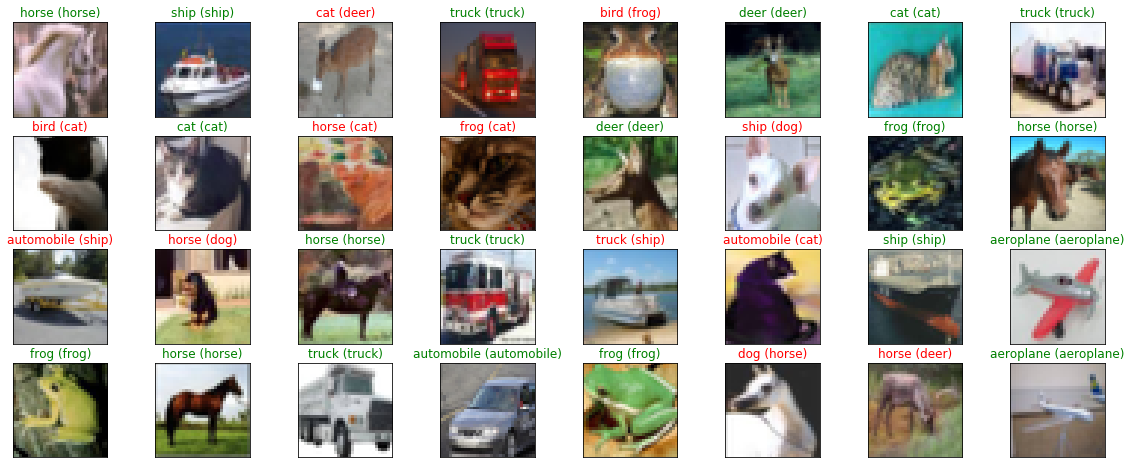

In [11]:
y_hat = model.predict(X_test)

cifar10_labels = ['aeroplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog', 'horse', 'ship', 'truck'] 

fig = plt.figure(figsize = (20 , 8))
for i , idx in enumerate(np.random.choice(X_test.shape[0] , size = 32 , replace = False)):
  ax = fig.add_subplot(4 , 8 , i + 1 , xticks = [] , yticks = [])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx] , cifar10_labels[true_idx]) , color = ("green" if pred_idx == true_idx else "red"))